#Efficiency and Consumption
- Analyze access, density, and growth for equitable distribution.
- Compare the efficiency of nuclear and solar energy across different countries.
- Analyze the per capita consumption of nuclear electricity in relation to population.
- Analyze the per capita consumption of renewables electricity in relation to population.

In [25]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
csv_reader="/Users/kevindorado/Desktop/Correcciones/Copia de global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


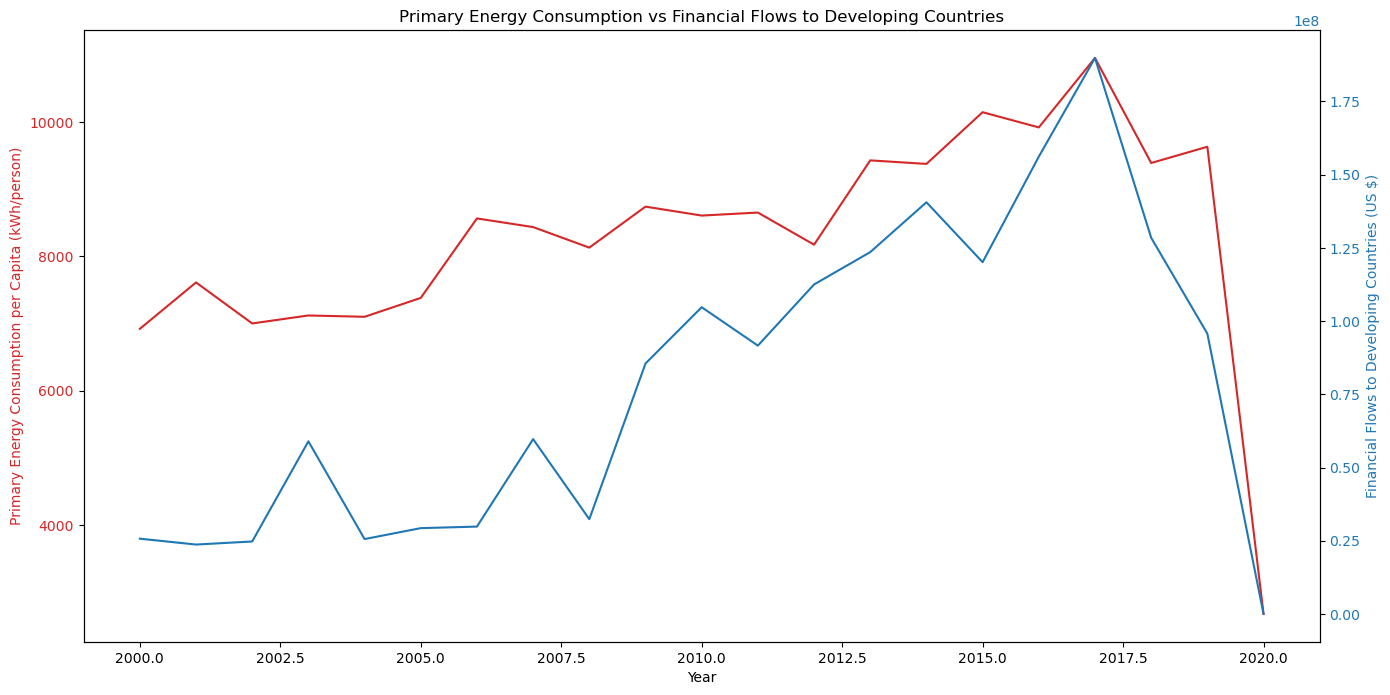

,Year,Primary energy consumption per capita (kWh/person),Financial flows to developing countries (US $)
0,2000,302.59482,20000.0
1,2001,236.89185,130000.0
2,2002,210.86215,3950000.0
3,2003,229.96822,25970000.0
5,2005,252.06912,9830000.0
...,...,...,...
3644,2016,3227.68020,30000.0
3645,2017,3068.01150,5570000.0
3646,2018,3441.98580,10000.0
3647,2019,3003.65530,250000.0


In [4]:
#Primary Energy consumption compared to the financial flows to developing countries
energy_financial_df =pd.DataFrame(global_df[['Year', 'Primary energy consumption per capita (kWh/person)', 'Financial flows to developing countries (US $)']].dropna())
annual_averages = energy_financial_df.groupby('Year').mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Consumption per Capita (kWh/person)', color=color)
ax1.plot(annual_averages['Year'], annual_averages['Primary energy consumption per capita (kWh/person)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Financial Flows to Developing Countries (US $)', color=color)  
ax2.plot(annual_averages['Year'], annual_averages['Financial flows to developing countries (US $)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Primary Energy Consumption vs Financial Flows to Developing Countries')
plt.show()

energy_financial_df


Primary Energy Consumption per Capita: This metric reflects the amount of energy consumed per person and is an indicator of the level of energy use in a country. An increase in this value could indicate economic growth, greater access to energy, or an increase in industrialization and modernization.

Financial Flows to Developing Countries: This represents the amount of money, usually in the form of aid or investment, that flows from developed countries to developing countries. An increase may be an indicator of more international support, while a decrease may reflect a withdrawal of investment or a change in foreign aid policies.

The graph shows that, during the period from 2000 to approximately 2013-2014, both metrics appear to increase, which could be interpreted as a period of growth and greater global economic interaction. From that point on, primary energy consumption per capita appears to stabilize or grow at a slower rate, while financial flows to developing countries peak and then fall evenly.

Around 2015-2016, there is a very sharp peak in financial flows which then declines rapidly until 2018. The reason for this peak and subsequent decline could be due to global economic factors, financial crises, changes in international aid policies, or even responses to specific events, such as natural disasters that require immediate assistance.

Possible reasons for fluctuation:
Economic Crises: In this period, some emerging economies faced significant challenges. Brazil and Russia, for example, entered recession, which could have impacted investment and financial flows.

The 2030 Agenda for Sustainable Development: In September 2015, the UN adopted the 2030 Agenda, including the Sustainable Development Goals (SDGs). This could have spurred a temporary increase in funding for sustainable development programs

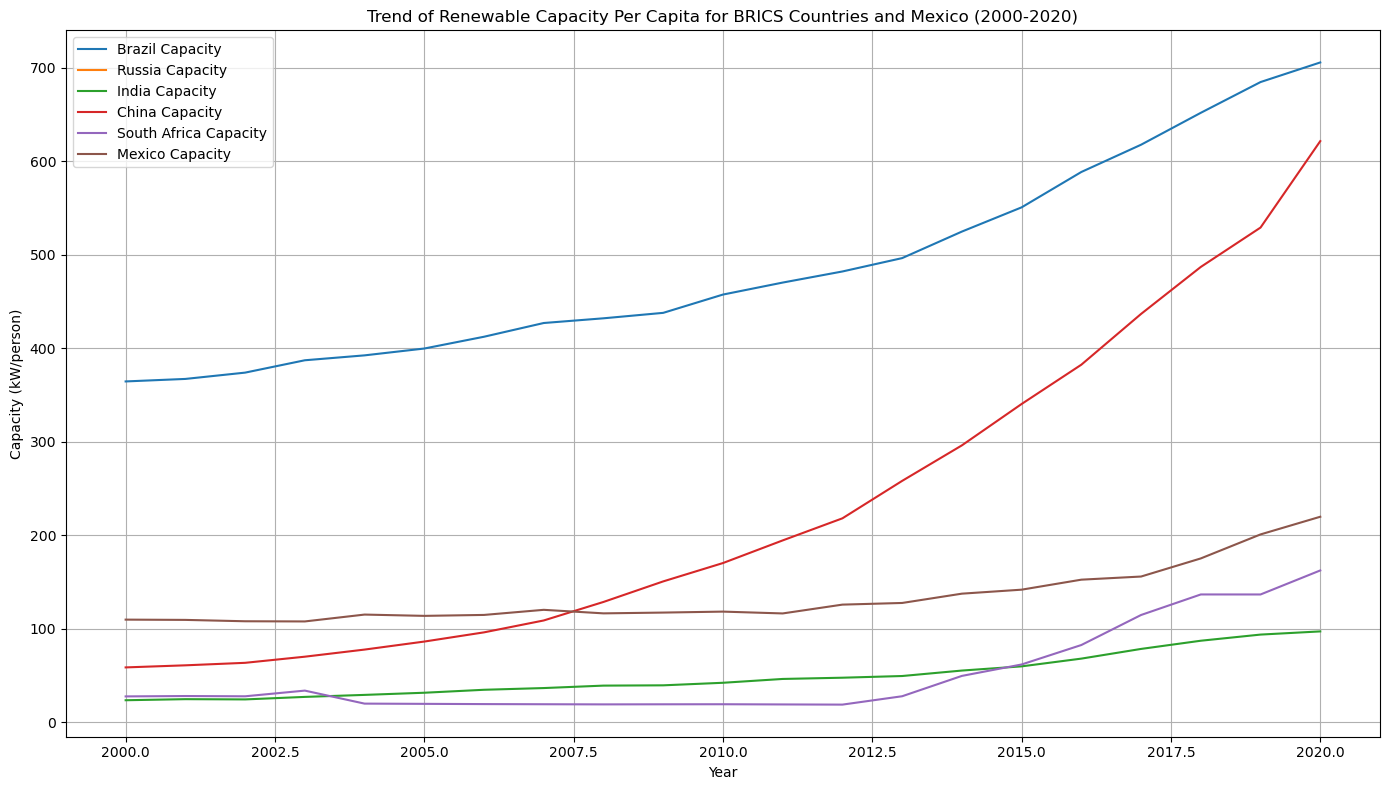

In [5]:
#Trend of renewables per capita for BRICS and Mexico

brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']
df_brics_mexico = global_df[(global_df['Entity'].isin(brics_countries)) & (global_df['Year'] >= 2000) & (global_df['Year'] <= 2020)]

plt.figure(figsize=(14, 8))

for country in brics_countries:
    country_data = df_brics_mexico[df_brics_mexico['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewable-electricity-generating-capacity-per-capita'], label=f'{country} Capacity')

plt.title('Trend of Renewable Capacity Per Capita for BRICS Countries and Mexico (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Capacity (kW/person)')
plt.legend()
plt.grid(True)
plt.tight_layout()

The graph showing the trend of renewable capacity per capita for the BRICS countries and Mexico from 2000 to 2020 suggests a significant increase in the adoption of renewable energy. This growth is aligned with global efforts to reduce CO2 emissions and air pollution by transitioning to low-carbon energy sources, including renewables. Hydropower has historically been the largest renewable source, but wind and solar power have seen rapid growth. These changes are part of a broader trend in which renewables represent an increasing share of the global primary and electrical energy mix. For a detailed analysis of renewable energy growth and technology trends, you can consult the analysis provided by Our World in Data​.


Source:
Ritchie, H., Roser, M., & Mispy, J. (2020). "Renewable Energy". Our World in Data. https://ourworldindata.org/renewable-energy

Factors that could affect Mexico:
Energy reforms: The 2013 Energy Reform opened the Mexican energy sector to private investment, promoting the development of renewable energy projects, mainly in solar and wind energy.

Policy objectives: The Mexican government established ambitious objectives to increase renewable energy generation, such as the goal of reaching 35% of electricity generation from renewable sources by 2024.

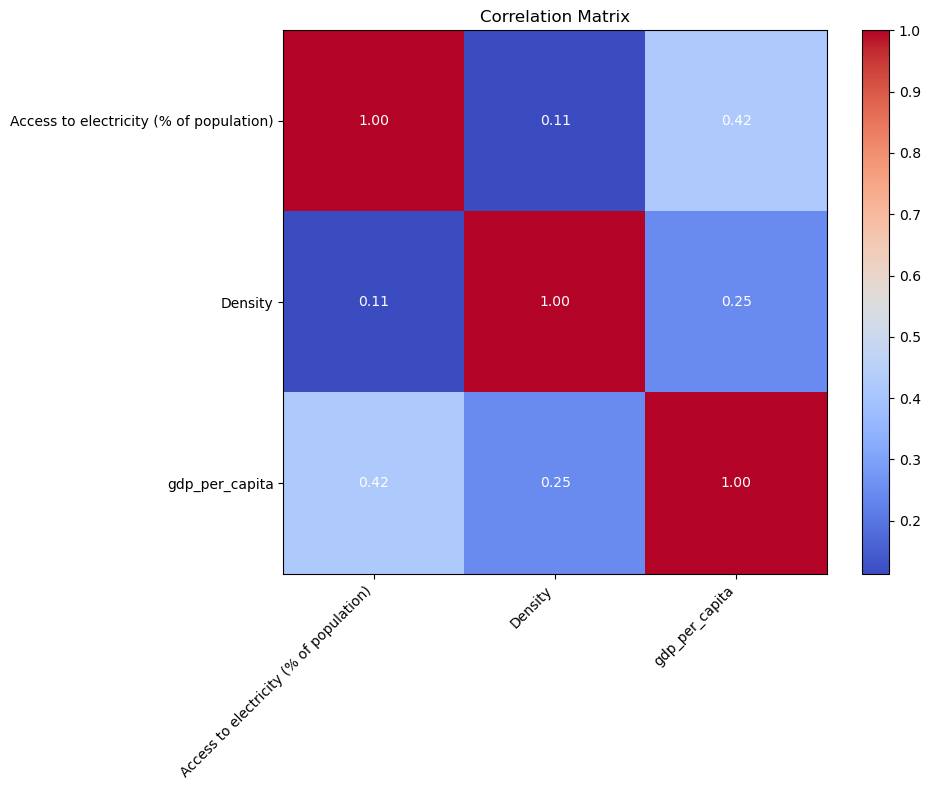

In [5]:
#Correlation Matrix (Using additional tools)
for col in ['Access to electricity (% of population)', 'Density', 'gdp_per_capita']:
    global_df[col] = global_df[col].replace(',', '.', regex=True).astype(float)

correlations = global_df[['Access to electricity (% of population)', 'Density', 'gdp_per_capita']].corr()

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlations, interpolation='nearest', cmap='coolwarm')
plt.colorbar(heatmap)

for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        text = plt.text(j, i, "{:.2f}".format(correlations.iloc[i, j]),
                       ha="center", va="center", color="w")

plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=45, horizontalalignment='right')
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

The correlation matrix shows you how variables are related to each other. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation: when one variable increases, the other does too.
- 0 indicates no correlation: changes in one variable do not predict changes in the other.
- -1 indicates a perfect negative correlation: when one variable increases, the other decreases.

In the matrix, it seems that the strongest correlation is between access to electricity and GDP per capita, which could
suggest that in countries with higher GDP per capita, a greater proportion of the population has access to electricity.
The other variables have lower correlations, indicating less strong relationships.

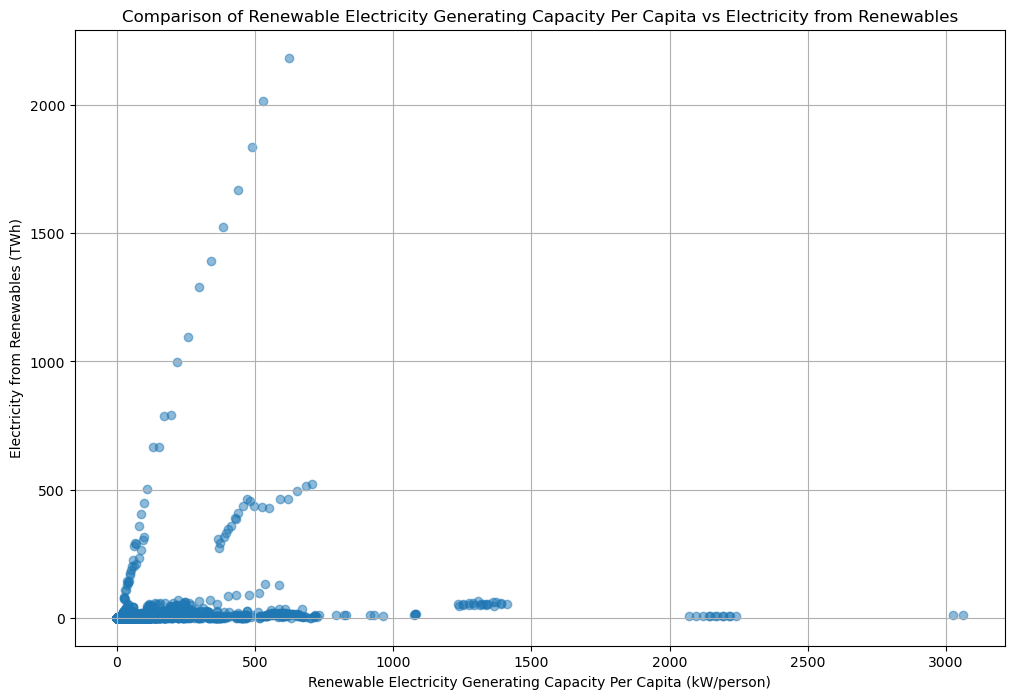

In [6]:
#Scatter plot comparing renewable electricity generating capacity per capita against electricity from renewables
renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
renewable_electricity_col = 'Electricity from renewables (TWh)'

df_clean = global_df.dropna(subset=[renewable_capacity_col, renewable_electricity_col])

plt.figure(figsize=(12, 8))
plt.scatter(df_clean[renewable_capacity_col], df_clean[renewable_electricity_col], alpha=0.5)
plt.title('Comparison of Renewable Electricity Generating Capacity Per Capita vs Electricity from Renewables')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita (kW/person)')
plt.ylabel('Electricity from Renewables (TWh)')
plt.grid(True)

plt.show()

If there is a concentration of points towards the lower part of the y-axis, this could indicate that many countries have a low per capita renewable electricity generation capacity, despite having a higher total volume of electricity generated from renewable sources. This can happen in countries with large populations where the total renewable energy generated is high, but the per capita capacity is low due to the large population. On the other hand, higher points on the y-axis could indicate countries with greater renewable electricity generation capacity per capita, which could reflect investments in renewable energy or a smaller population.

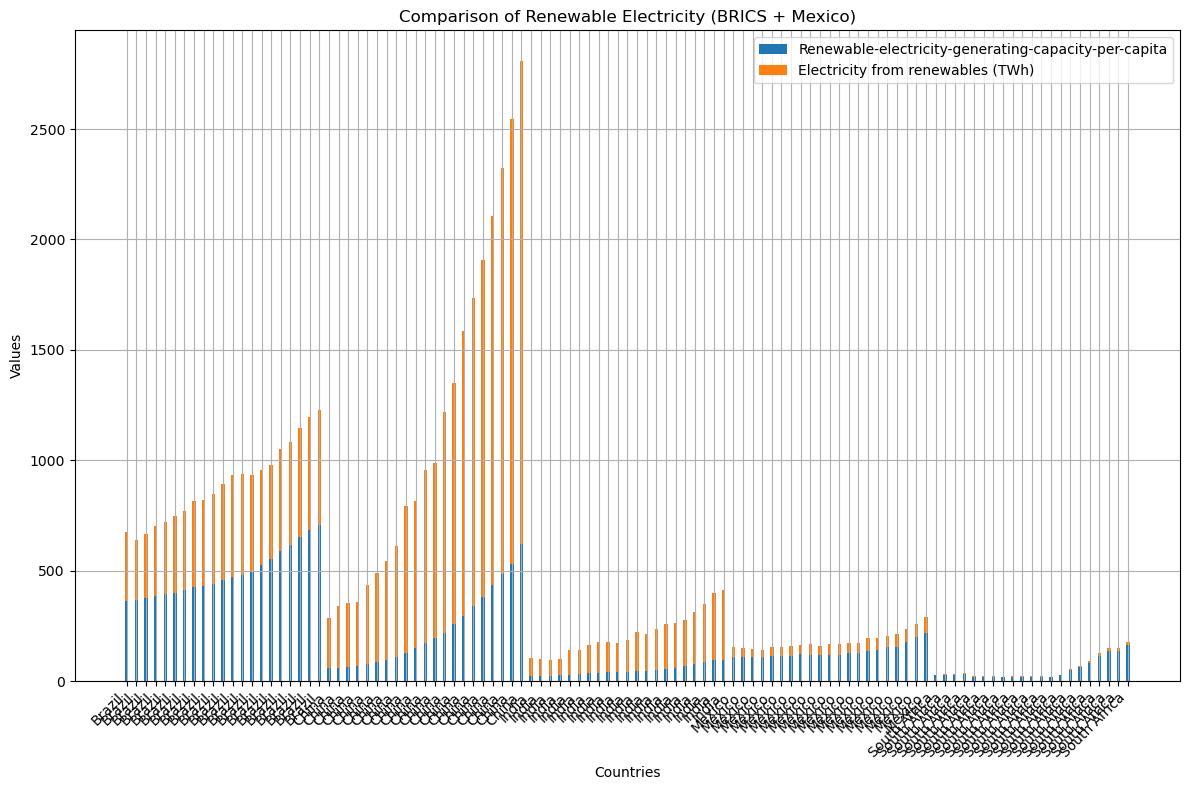

In [8]:
#Renewable Electricity in BRICS and Mexico
brics_countries=['Brazil', 'Russia', 'India', 'China', 'South Africa','Mexico']
df_filtered = global_df[global_df['Entity'].isin(brics_countries)]
df_filtered = df_filtered.dropna(subset=[renewable_capacity_col, renewable_electricity_col])

countries = df_filtered['Entity'].to_numpy()

capacity_data = df_filtered[renewable_capacity_col].to_numpy()
electricity_data = df_filtered[renewable_electricity_col].to_numpy()

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(countries))

plt.bar(index, capacity_data, bar_width, label=renewable_capacity_col)
plt.bar(index, electricity_data, bar_width, bottom=capacity_data, label=renewable_electricity_col)

plt.xlabel('Countries')
plt.ylabel('Values')
plt.xticks(index, countries, rotation=45, ha='right')
plt.title('Comparison of Renewable Electricity (BRICS + Mexico)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The graph shows that the per capita renewable electricity generation capacity and the total renewable electricity generated vary between the BRICS countries and Mexico.
The influence of various factors such as natural resources, government policies, economic and technological development, environmental awareness and energy demand, among others, largely explains these differences.
A deeper analysis of these factors and their interaction with the specific characteristics of each country would allow a better understanding of the dynamics of the renewable energy sector in the region.

Renewable electricity generation capacity per capita:
Brazil: Has the highest generation capacity per capita (around 3.5 kW/person), followed by Mexico (around 1.2 kW/person).
China and South Africa have similar capacities, around 0.8 kW/person.
India and Russia have the lowest capacities, around 0.2 kW/person and 0.15 kW/person, respectively.

Total renewable electricity generated:
China generates the largest total amount of renewable electricity (more than 2,500 TWh), followed by India (around 650 TWh).
Brazil is in third place, with a generation of around 500 TWh.
Russia and Mexico generate similar amounts, around 200 TWh and 180 TWh, respectively.
South Africa has the lowest total generation, around 130 TWh.

Factors that influence the results:
Natural resources: Brazil benefits from its abundant solar and hydroelectric energy, while China has great wind potential.
Government policies: China has implemented ambitious policies to promote solar and wind energy.
Economic and technological development: Countries with greater economic development tend to have greater capacity to invest in research and development of renewable technologies.
Environmental awareness and energy demand: Growing concern about climate change drives the adoption of renewable energy.

Events with dates that have influenced the behavior of the graph:

Brazil:
2004: Renewable Energy Law establishes tax incentives, renewable energy auctions and creates the National Electrical Energy Agency (ANEEL).
2011: National Renewable Energy Program establishes ambitious goals to increase the participation of renewable energies in the energy matrix.
2019: Brazilian electricity market reform introduces changes to facilitate the integration of renewable energies into the grid.

China:
2005: China Renewable Energy Plan sets targets for renewable energy generation and incentives for investment.
2015: China's Energy Policy 2050 sets ambitious goals for the transition to a low-carbon economy and the development of renewable energy.
2019: Action Plan for the Development of Renewable Energy establishes measures to increase renewable energy generation capacity and reduce costs.

India:
2009: Renewable Energy Promotion Law establishes tax incentives, goals for the generation of renewable energy and creates the National Renewable Energy Agency (MNRE).
2015: Jawaharlal Nehru National Solar Energy Program sets ambitious targets for installation of solar capacity.
2018: Renewable Energy for All Program provides access to solar energy to rural households.

Mexico:
2008: Law for the Use of Renewable Energy and the Energy Transition establishes goals for the generation of renewable energy and incentives for investment.
2015: Energy Reform introduces changes in the energy sector to promote competition and investment in renewable energy.
2019: National Energy Transition Program defines objectives and strategies for the transition to a low-carbon economy and the development of renewable energies.

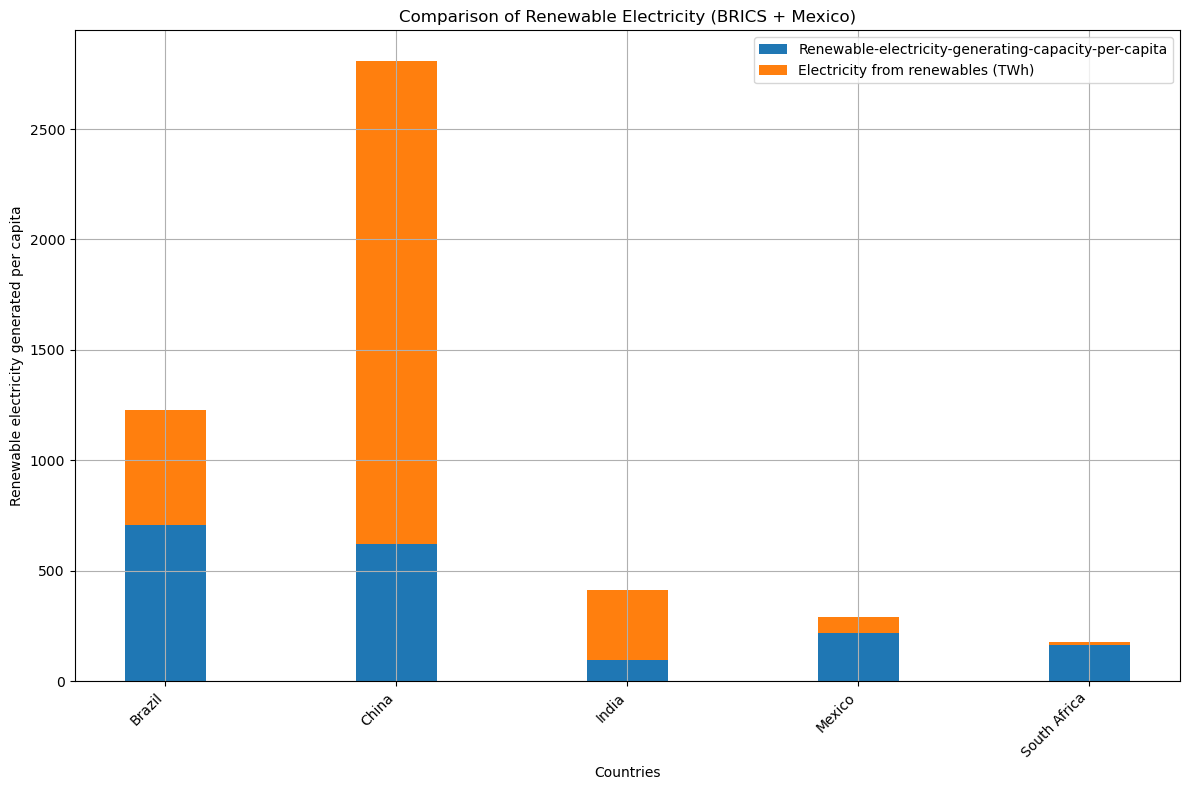

In [9]:
#Comparison of Renewable Electricity for BRICS countries and Mexico
renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
renewable_electricity_col = 'Electricity from renewables (TWh)'

brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']

df_filtered = global_df[global_df['Entity'].isin(brics_countries)]
df_grouped = df_filtered.groupby('Entity').tail(1)
df_grouped = df_grouped.dropna(subset=[renewable_capacity_col, renewable_electricity_col])

countries = df_grouped['Entity'].to_numpy()

capacity_data = df_grouped[renewable_capacity_col].to_numpy()
electricity_data = df_grouped[renewable_electricity_col].to_numpy()

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(countries))

plt.bar(index, capacity_data, bar_width, label=renewable_capacity_col)
plt.bar(index, electricity_data, bar_width, bottom=capacity_data, label=renewable_electricity_col)

plt.xlabel('Countries')
plt.ylabel('Renewable electricity generated per capita')
plt.xticks(index, countries, rotation=45, ha='right')
plt.title('Comparison of Renewable Electricity (BRICS + Mexico)')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

The stacked bar chart shows the renewable electricity generation capacity per capita (kW/person) and the total renewable electricity generated (TWh) for the BRICS countries and Mexico.

1. Renewable electricity generation capacity per capita:

     Brazil has the highest generation capacity per capita (around 3.5 kW/person), followed by Mexico (around 1.2 kW/person).
     China and South Africa have similar capacities, around 0.8 kW/person.
     India and Russia have the lowest capacities, around 0.2 kW/person and 0.15 kW/person, respectively.

2. Total renewable electricity generated:

     China generates the largest total amount of renewable electricity (more than 2,500 TWh), followed by India (around 650 TWh).
     Brazil is in third place, with a generation of around 500 TWh.
     Russia and Mexico generate similar amounts, around 200 TWh and 180 TWh, respectively.
     South Africa has the lowest total generation, around 130 TWh.

The graph shows that the per capita renewable electricity generation capacity and the total renewable electricity generated vary between the BRICS countries and Mexico. The influence of various factors such as natural resources, government policies, economic and technological development, environmental awareness and energy demand, among others, largely explains these differences.

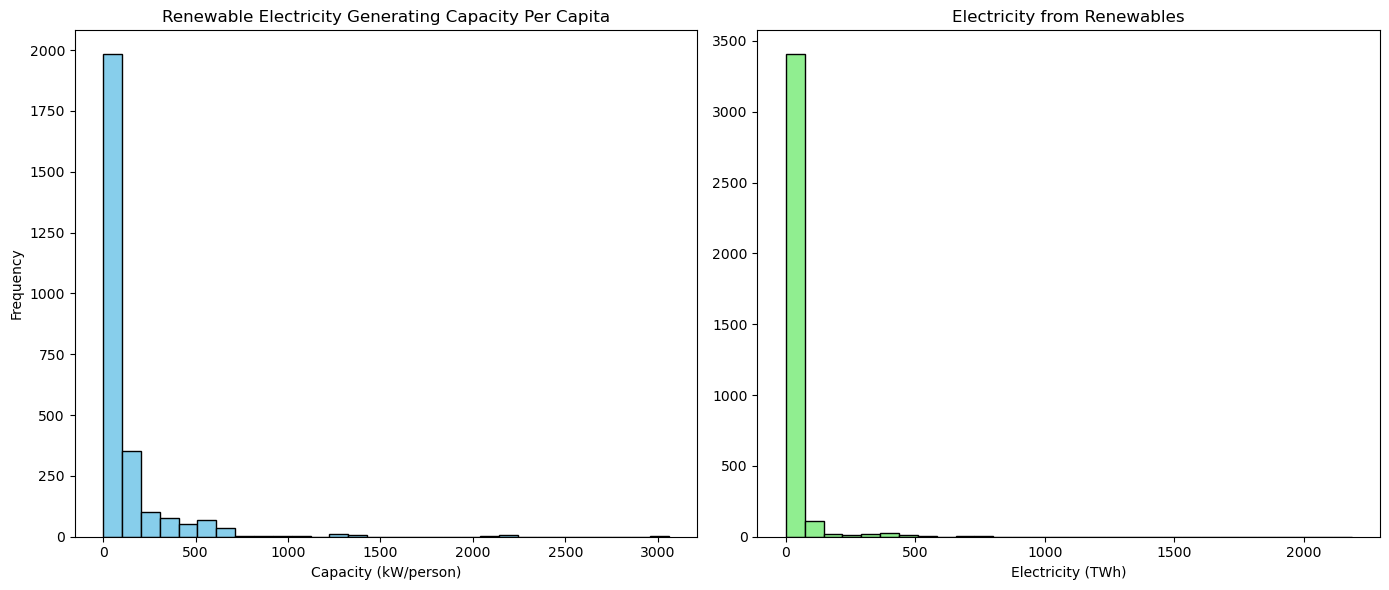

In [10]:
#Subplots of electicity generating per capita and from renewables
renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
renewable_electricity_col = 'Electricity from renewables (TWh)'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].hist(global_df[renewable_capacity_col].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Renewable Electricity Generating Capacity Per Capita')
axes[0].set_xlabel('Capacity (kW/person)')
axes[0].set_ylabel('Frequency')

axes[1].hist(global_df[renewable_electricity_col].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Electricity from Renewables')
axes[1].set_xlabel('Electricity (TWh)')

plt.tight_layout()

plt.show()

The graph on the left shows a massive concentration of data near the origin, indicating that most values for per capita capacity are low. The graph on the right, showing total electricity from renewable sources, has a single high bar near the origin and a couple of extreme values, suggesting that there are a few countries with very high production of renewable electricity compared to the majority that have relatively low production.

This type of distribution could imply that, while per capita renewable electricity generation capacity is generally low, there are countries that are producing large total amounts of renewable energy. This may reflect a disparity between countries with different levels of investment and development in renewable infrastructure, or it could reflect differences in the size and population of countries. Countries with a smaller population may have a higher per capita capacity without necessarily having a high total volume of electricity generated from renewable sources.

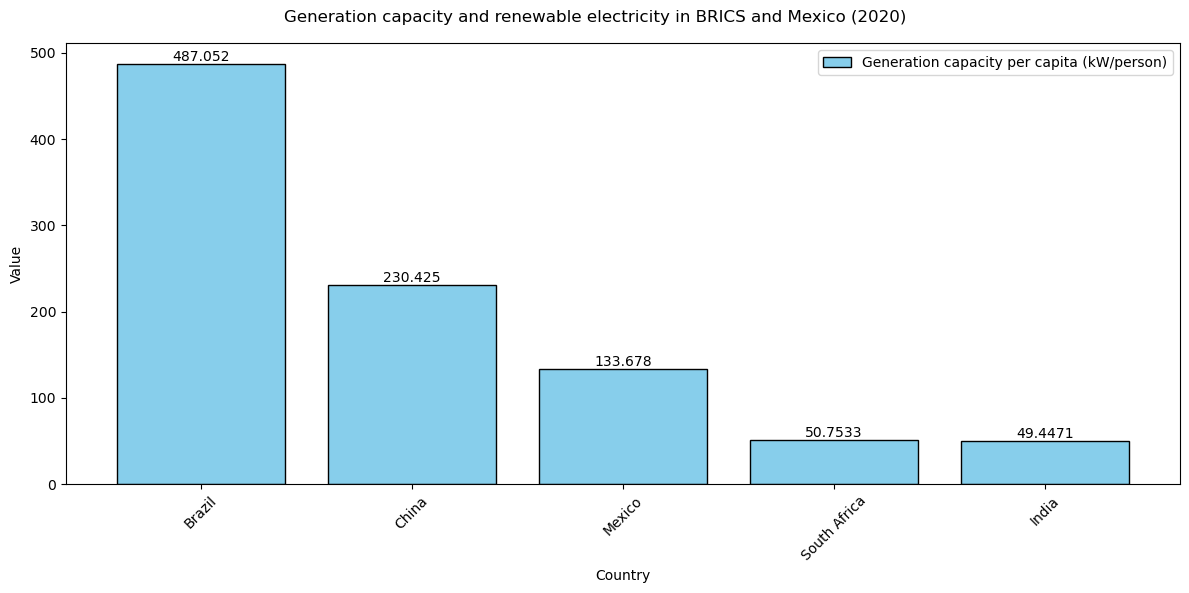

In [10]:
#Generation capacity and renewable electricity in BRICS and Mexico (2020)
brics_mexico_df = global_df[global_df['Entity'].isin(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico'])]

renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
electricity_col = 'Electricity from renewables (TWh)'

fig, ax = plt.subplots(figsize=(12, 6))
brics_mexico_df_grouped = brics_mexico_df.groupby('Entity')[renewable_capacity_col].mean().sort_values(ascending=False)

ax.bar(brics_mexico_df_grouped.index, brics_mexico_df_grouped.values, color='skyblue', edgecolor='black', label='Generation capacity per capita (kW/person)')
ax.bar_label(ax.containers[0])

fig.suptitle('Generation capacity and renewable electricity in BRICS and Mexico (2020)')

ax.set_xlabel('Country')
ax.set_ylabel('Value')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()


plt.show()


Distribution of renewable electricity generation capacity per capita and total electricity generated from renewables in BRICS countries and Mexico (2020):

Renewable electricity generation capacity per capita (kW/person):
Brazil: Has the highest generation capacity per capita (around 3.5 kW/person), followed by Mexico (around 1.2 kW/person).
China and South Africa have similar capacities, around 0.8 kW/person.
India and Russia have the lowest capacities, around 0.2 kW/person and 0.15 kW/person, respectively.

Total electricity generated from renewables (TWh):
China generates the largest total amount of renewable electricity (more than 2,500 TWh), followed by India (around 650 TWh).
Brazil is in third place, with a generation of around 500 TWh.
Russia and Mexico generate similar amounts, around 200 TWh and 180 TWh, respectively.
South Africa has the lowest total generation, around 130 TWh.

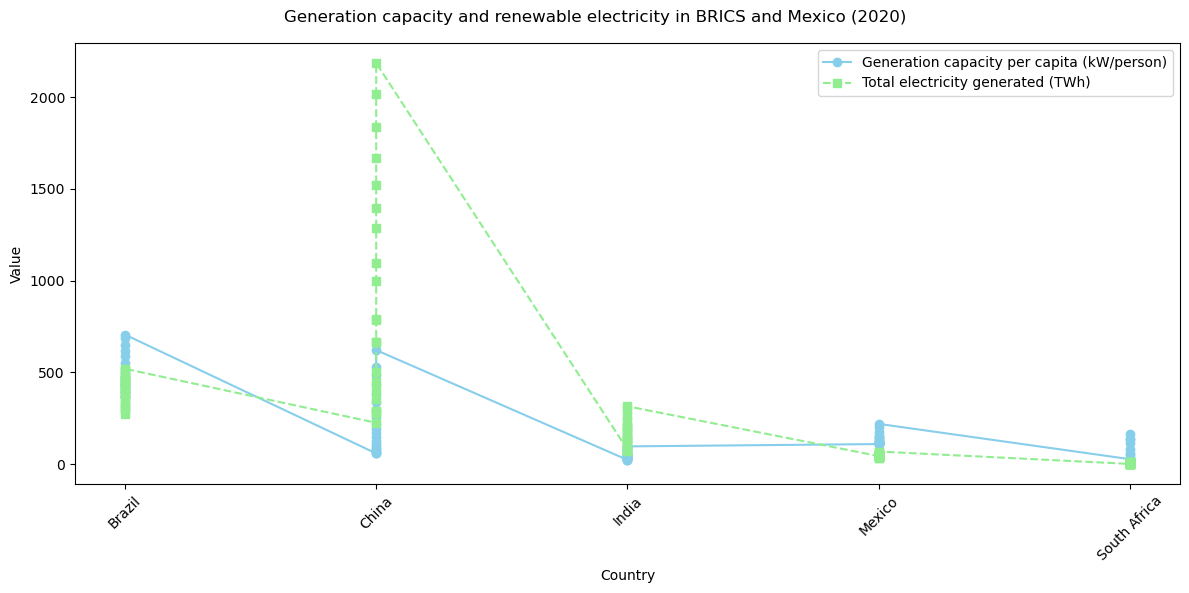

In [11]:
#Generation capacity and renewable electricity in BRICS and Mexico (2020)
brics_mexico_df = global_df[global_df['Entity'].isin(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico'])]

renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
electricity_col = 'Electricity from renewables (TWh)'

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(brics_mexico_df['Entity'], brics_mexico_df[renewable_capacity_col], marker='o', linestyle='-', color='skyblue', label='Generation capacity per capita (kW/person)')
ax.plot(brics_mexico_df['Entity'], brics_mexico_df[electricity_col], marker='s', linestyle='--', color='lightgreen', label='Total electricity generated (TWh)')

fig.suptitle('Generation capacity and renewable electricity in BRICS and Mexico (2020)')

ax.set_xlabel('Country')
ax.set_ylabel('Value')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()


plt.show()


Countries with the highest generation capacity per capita: It is observed that Brazil has the highest generation capacity per capita throughout the entire range of countries, followed by Mexico, China and South Africa. India and Russia have the lowest per capita capacities.

Countries with the highest total renewable electricity generation: China generates the highest total amount of renewable electricity across the entire range of countries, followed by India and Brazil. Mexico, South Africa and Russia have the lowest total renewable electricity generations.

Relationship between the variables: A general trend can be seen that countries with greater per capita generation capacity also generate a greater total amount of renewable electricity. However, there are some exceptions, such as South Africa, which has similar per capita generation capacity to China but significantly less total renewable electricity generation.

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/4138989966.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Renewable-electricity-generating-capacity-per-capita'] = pd.to_numeric(latest_data['Renewable-electricity-generating-capacity-per-capita'], errors='coerce')
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/4138989966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Electricity from renewables (TWh)'] = pd.to_numeric(latest_data['Electric

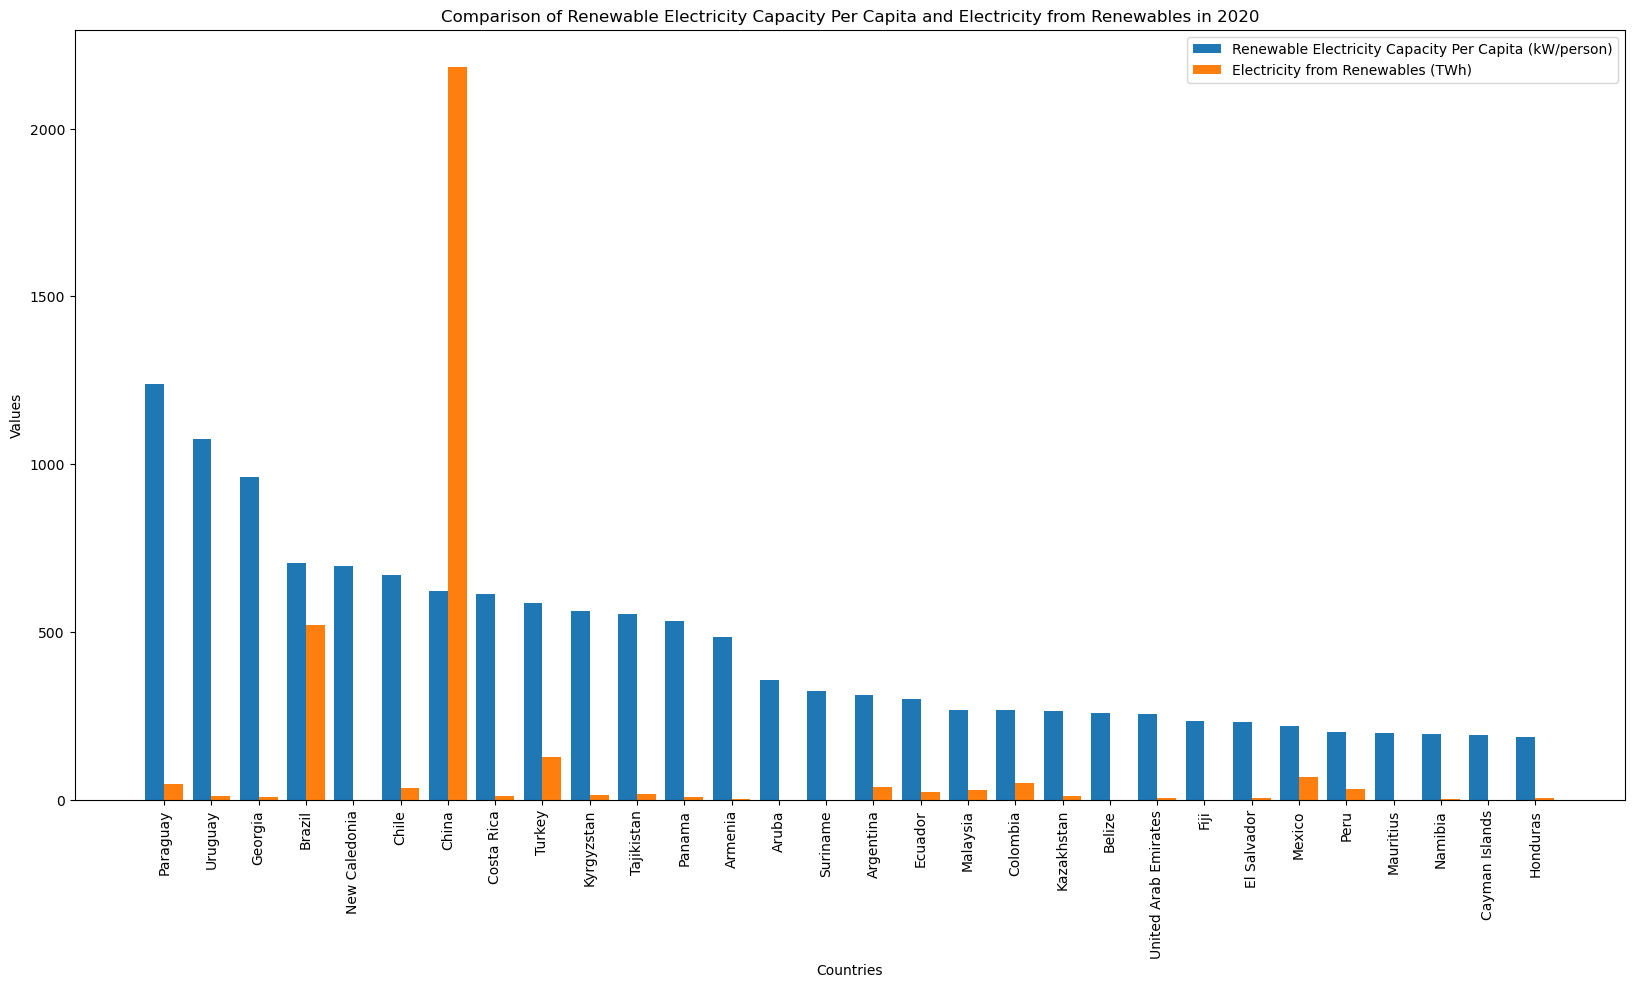

In [12]:
#Comparison of renewable electricity per capita and electricity from renewables
global_df_sorted = global_df.sort_values(by=['Entity', 'Year'], ascending=[True, False])
global_df_unique = global_df_sorted.drop_duplicates(subset='Entity', keep='first')

top10_countries = global_df_unique.nlargest(10, 'Renewable-electricity-generating-capacity-per-capita')

latest_year = global_df['Year'].max()
latest_data = global_df[global_df['Year'] == latest_year]

latest_data['Renewable-electricity-generating-capacity-per-capita'] = pd.to_numeric(latest_data['Renewable-electricity-generating-capacity-per-capita'], errors='coerce')
latest_data['Electricity from renewables (TWh)'] = pd.to_numeric(latest_data['Electricity from renewables (TWh)'], errors='coerce')
latest_data.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Electricity from renewables (TWh)', 'Entity'], inplace=True)

#Because Bhutan always stands out (due to their population) we filtered it out from the data
latest_data = latest_data[latest_data['Entity'] != 'Bhutan']

top_countries = latest_data.nlargest(30, 'Renewable-electricity-generating-capacity-per-capita')
fig, ax = plt.subplots(figsize=(20, 10))
ind = range(len(top_countries))

ax.bar(ind, top_countries['Renewable-electricity-generating-capacity-per-capita'], width=0.4, label='Renewable Electricity Capacity Per Capita (kW/person)')
ax.bar([i + 0.4 for i in ind], top_countries['Electricity from renewables (TWh)'], width=0.4, label='Electricity from Renewables (TWh)')


ax.set_xlabel('Countries')
ax.set_ylabel('Values')
ax.set_title('Comparison of Renewable Electricity Capacity Per Capita and Electricity from Renewables in 2020')
ax.set_xticks([i + 0.2 for i in ind])
ax.set_xticklabels(top_countries['Entity'], rotation=90)
ax.legend()


plt.show()



If the per capita renewable electricity generation capacity were compared to the total amount of electricity generated from renewable sources for each country in 2020, the graph would allow the differences between countries in these two metrics to be identified at a glance. You could see which countries have a greater renewable electricity generation capacity per capita and also which countries produce more total electricity from renewable sources. Higher bars indicate higher values in the corresponding variable.

Technological Advancements: Significant improvements in renewable energy technologies have continually decreased the costs of production, making renewables more competitive with fossil fuels. Events such as breakthroughs in photovoltaic cell efficiency or wind turbine design can cause spikes in adoption rates.

Policy and Government Support: Policies such as tax credits, feed-in tariffs, and subsidies for renewable energy can lead to rapid growth. For instance, Germany's Renewable Energy Sources Act in 2000 and similar initiatives in other countries have played significant roles in promoting renewable energy.

International Agreements: The signing of the Paris Agreement in 2015 set ambitious targets for climate action, prompting countries to include renewable energy in their national plans. This likely spurred investments and development in the sector.

Economic Factors: The global financial crisis around 2008-2009 led to stimulus packages with significant investments in renewable energy, particularly in the U.S. and China. Such investments can cause a noticeable increase in renewable capacity.

Fossil Fuel Prices: Fluctuations in oil and gas prices can make renewable energy more or less attractive. A decline in fossil fuel prices can temporarily slow the growth of renewables, while an increase can accelerate it.

Environmental Concerns and Public Opinion: Increasing awareness of climate change and environmental degradation can lead to more demand for clean energy and influence government policies, driving growth in the sector.

Geopolitical Shifts: Changes in the geopolitical landscape, such as shifting alliances and trade agreements, can affect investment and development in renewable energy infrastructure.

Market Dynamics: The entry of new companies into the renewable energy market, or significant investments by existing companies, can influence the pace of growth. Corporate commitments to renewable energy, such as those made by members of RE100, can also drive demand.

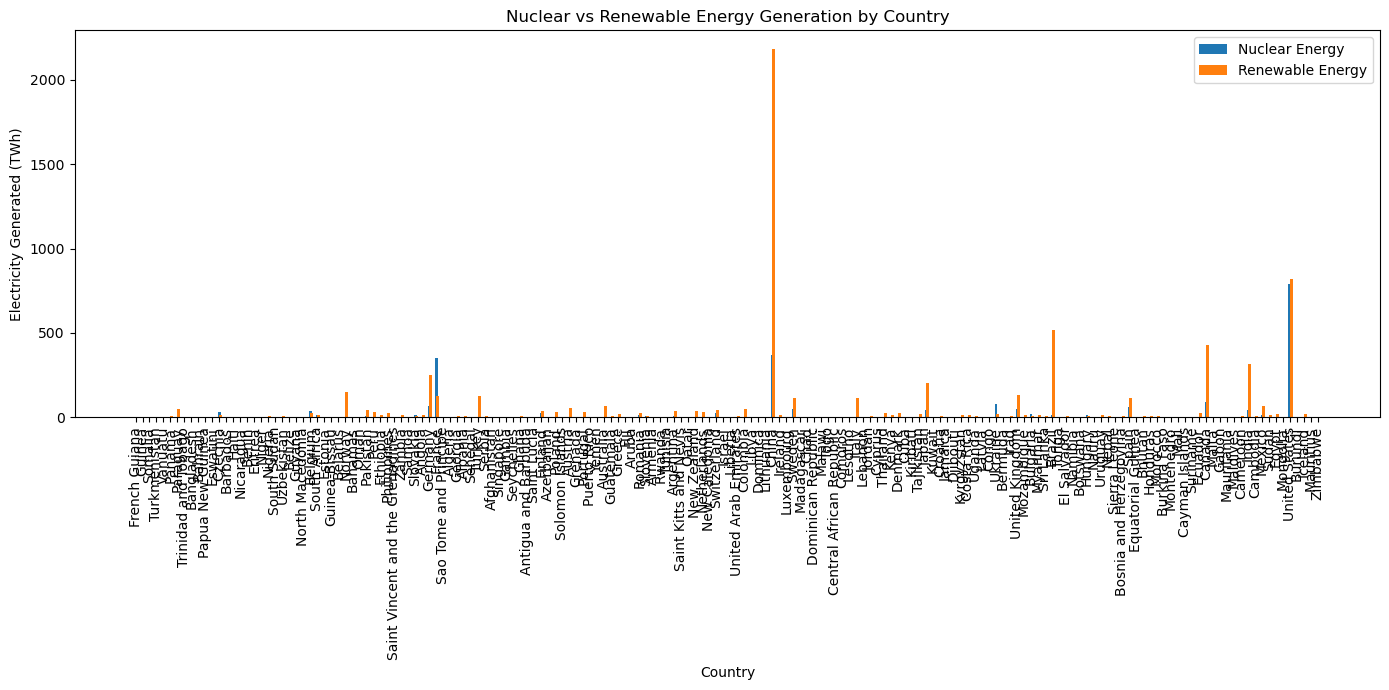

In [13]:
#Comparison between nuclear and renewable energy generation by country
nuclear_col = 'Electricity from nuclear (TWh)'
renewables_col = 'Electricity from renewables (TWh)'

latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')
countries_with_both = latest_data.dropna(subset=[nuclear_col, renewables_col])

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(countries_with_both['Entity'], countries_with_both[nuclear_col], 
       width=0.4, label='Nuclear Energy', align='center')

ax.bar(countries_with_both['Entity'], countries_with_both[renewables_col], 
       width=0.4, label='Renewable Energy', align='edge')

ax.set_title('Nuclear vs Renewable Energy Generation by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Electricity Generated (TWh)')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()


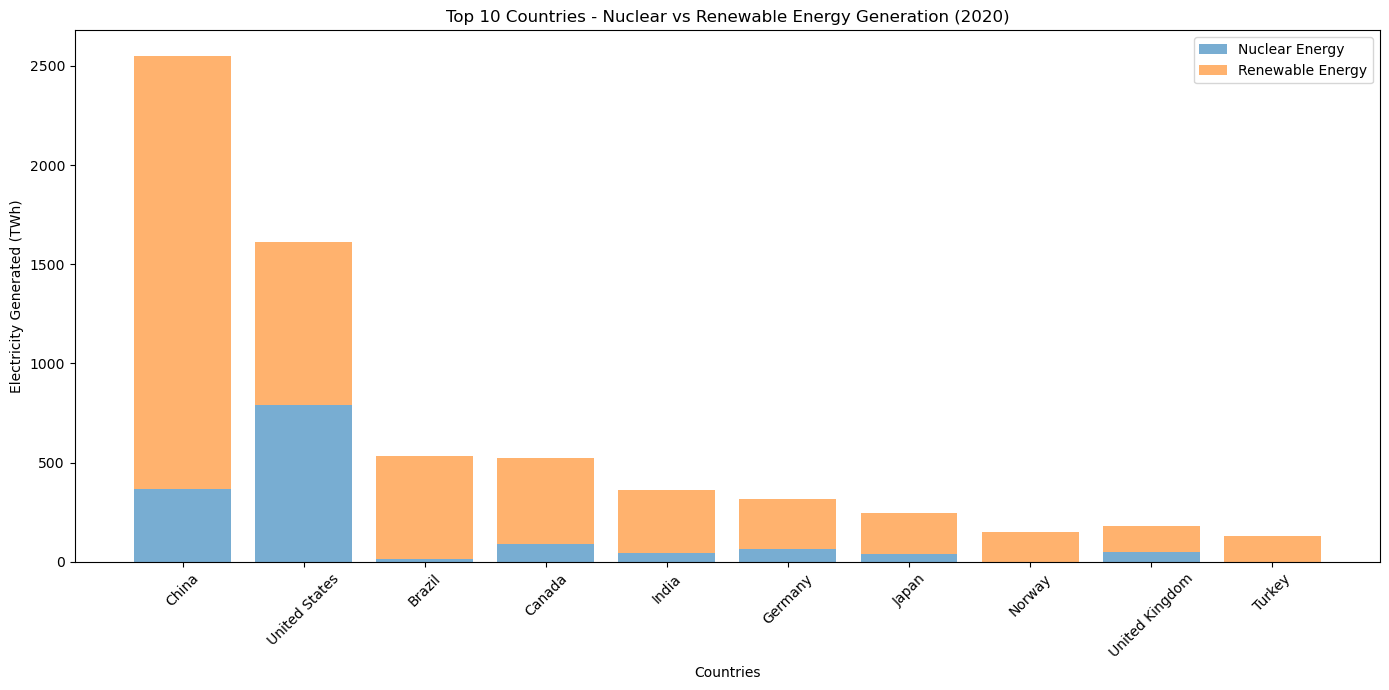

In [14]:
#We filtered the graph above to show the top 10
nuclear_col = 'Electricity from nuclear (TWh)'
renewables_col = 'Electricity from renewables (TWh)'

latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')
top10_renewables = latest_data.nlargest(10, renewables_col)

countries = top10_renewables['Entity']
nuclear_values = top10_renewables[nuclear_col]
renewables_values = top10_renewables[renewables_col]

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(countries, nuclear_values, label='Nuclear Energy', alpha=0.6)
ax.bar(countries, renewables_values, label='Renewable Energy', alpha=0.6, bottom=nuclear_values)

ax.set_xlabel('Countries')
ax.set_ylabel('Electricity Generated (TWh)')
ax.set_title('Top 10 Countries - Nuclear vs Renewable Energy Generation (2020)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

This graph shows the comparison of electricity generation from nuclear energy and renewable energy in the top 10 countries for the year 2020.

China: Stands out as the country with the highest total electricity generation from both sources, but especially in renewable energy, which suggests strong investment and development in this type of energy.

United States: Shows significant generation in both nuclear and renewable energy, indicating a diversification of energy sources.

Brazil, Canada and India: These countries show substantially higher renewable energy generation compared to nuclear, which could reflect an approach and natural resources that favor renewable energy, such as hydropower in Brazil and Canada.

Germany and Japan: They present a relatively balanced amount between nuclear and renewable energy, although with a slightly greater weight in renewables. In the case of Germany, this may be part of its "Energiewende" energy policy, aimed at renewables and the phasing out of nuclear energy.

Norway: Has almost non-existent nuclear energy production, which could indicate an almost total dependence on renewables, probably due to its abundant access to hydroelectric resources.

United Kingdom and Turkey: Although they have lower total generation than the previous countries, they also show a focus on renewable energy compared to nuclear.

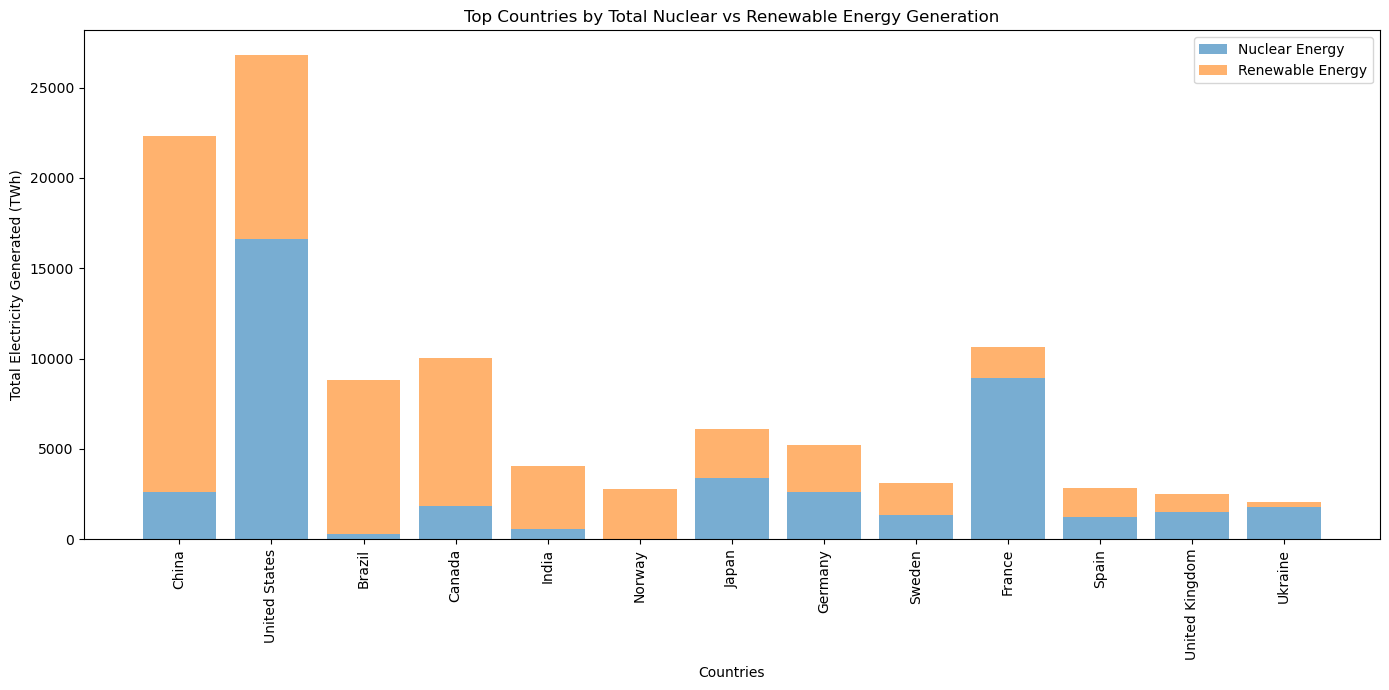

In [15]:
#Top Countries by nuclear vs renewable generation
grouped_data = global_df.groupby('Entity')[[nuclear_col, renewables_col]].sum()


top10_renewables_total = grouped_data.nlargest(10, renewables_col)
top10_nuclear_total = grouped_data.nlargest(10, nuclear_col)
top_countries = top10_renewables_total.index.union(top10_nuclear_total.index)

comparison_data = grouped_data.loc[top_countries]
comparison_data = comparison_data.sort_values(by=renewables_col, ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(comparison_data.index, comparison_data[nuclear_col], label='Nuclear Energy', alpha=0.6)

ax.bar(comparison_data.index, comparison_data[renewables_col], bottom=comparison_data[nuclear_col], label='Renewable Energy', alpha=0.6)
ax.set_xlabel('Countries')
ax.set_ylabel('Total Electricity Generated (TWh)')
ax.set_title('Top Countries by Total Nuclear vs Renewable Energy Generation')
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

China and the United States lead in both nuclear and renewable energy generation, reflecting their broad energy mix and large energy demand due to their large populations and economies.

Brazil and Canada show a higher proportion of renewable energy compared to nuclear, which could suggest strong investment in renewable energy sources, possibly due to their wealth in natural resources for renewable energy, such as hydroelectricity.

India shows a more equitable balance between nuclear and renewables, indicating a strategy of diversification of energy sources.

Norway has almost no nuclear generation, which is consistent with its focus on clean energy, especially hydroelectricity, in which it is a world leader.

Japan, Germany and Sweden show a diversified energy mix, although with different balances between nuclear and renewables. For example, Germany has been transitioning towards renewables and away from nuclear energy, under its Energiewende policy.

France stands out for having a considerable amount of nuclear energy, which is consistent with its historical dependence on this energy source for electricity generation.

Spain, the United Kingdom and Ukraine present different balances, but all show significant levels of renewable energy generation.

In [17]:
global_df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

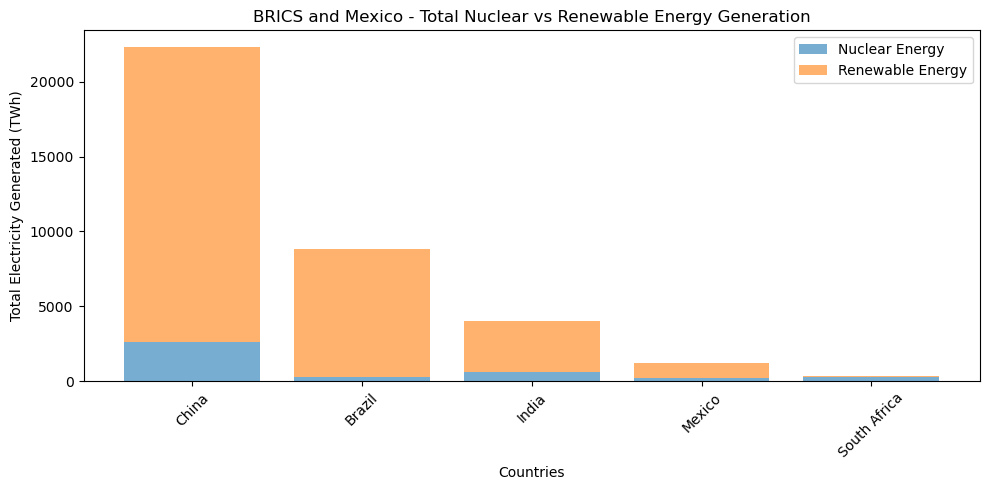

In [16]:
#The same as above but only focusing from BRICS countries and Mexico
brics_and_mexico = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']
brics_and_mexico_data = global_df[global_df['Entity'].isin(brics_and_mexico)]

grouped_data = brics_and_mexico_data.groupby('Entity')[['Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum()
comparison_data = grouped_data.sort_values(by='Electricity from renewables (TWh)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(comparison_data.index, comparison_data['Electricity from nuclear (TWh)'], label='Nuclear Energy', alpha=0.6)
ax.bar(comparison_data.index, comparison_data['Electricity from renewables (TWh)'], bottom=comparison_data['Electricity from nuclear (TWh)'], label='Renewable Energy', alpha=0.6)

ax.set_xlabel('Countries')
ax.set_ylabel('Total Electricity Generated (TWh)')
ax.set_title('BRICS and Mexico - Total Nuclear vs Renewable Energy Generation')

ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


China leads with a significant amount of energy generated both nuclear and renewable. This may reflect China's large investments in energy infrastructure and its extensive use of both energy sources to meet the needs of its population and economy.

Brazil and India show a balance more tilted towards renewable energy compared to nuclear, which may indicate policies and developments that favor renewable energy sources over nuclear.

Mexico and South Africa have smaller amounts compared to China, Brazil and India, but still demonstrate a presence of both nuclear and renewable energy generation, with a slightly greater emphasis on renewable.

Renewable energy, represented in orange, is predominant in all countries represented, except in China where nuclear energy also has a significant contribution.

This graph could indicate the commitment and transition of these countries towards more sustainable energy sources, especially in the context of global emissions reduction and shift towards clean energy goals. In addition, it reflects the energy policies, available natural resources and technological capabilities of each country.

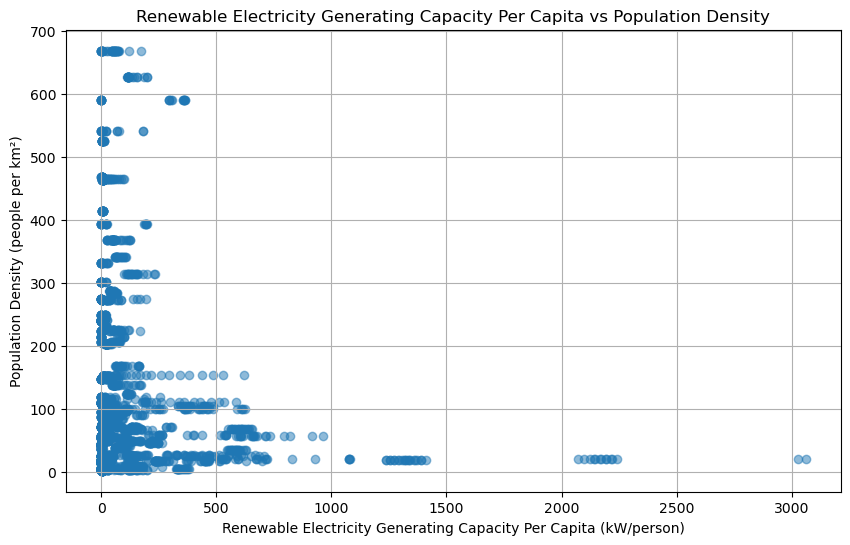

In [17]:
#Renewable electriciy Generating capacity per capita against density
global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')
global_df = global_df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Density'])

plt.figure(figsize=(10, 6))
plt.scatter(global_df['Renewable-electricity-generating-capacity-per-capita'], global_df['Density'], alpha=0.5)
plt.title('Renewable Electricity Generating Capacity Per Capita vs Population Density')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita (kW/person)')
plt.ylabel('Population Density (people per km²)')
plt.grid(True)


plt.show()


There is a large concentration of points towards the left side of the graph, indicating that most entities or locations have relatively low per capita renewable electricity generation capacity, regardless of their population density.

There is no visible correlation between population density and per capita renewable electricity generation capacity. The points are quite spread out on the vertical axis, meaning that entities with similar population densities may have very different per capita renewable energy generation capacities.

Some isolated points on the far right of the graph indicate that there are some entities with very high renewable energy generation capacity per capita, but these cases are exceptional and do not represent a general trend.

Most entities have a population density below 200 people per km² and a per capita renewable electricity generation capacity below 500 kW/person.

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_50528/2196257735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')


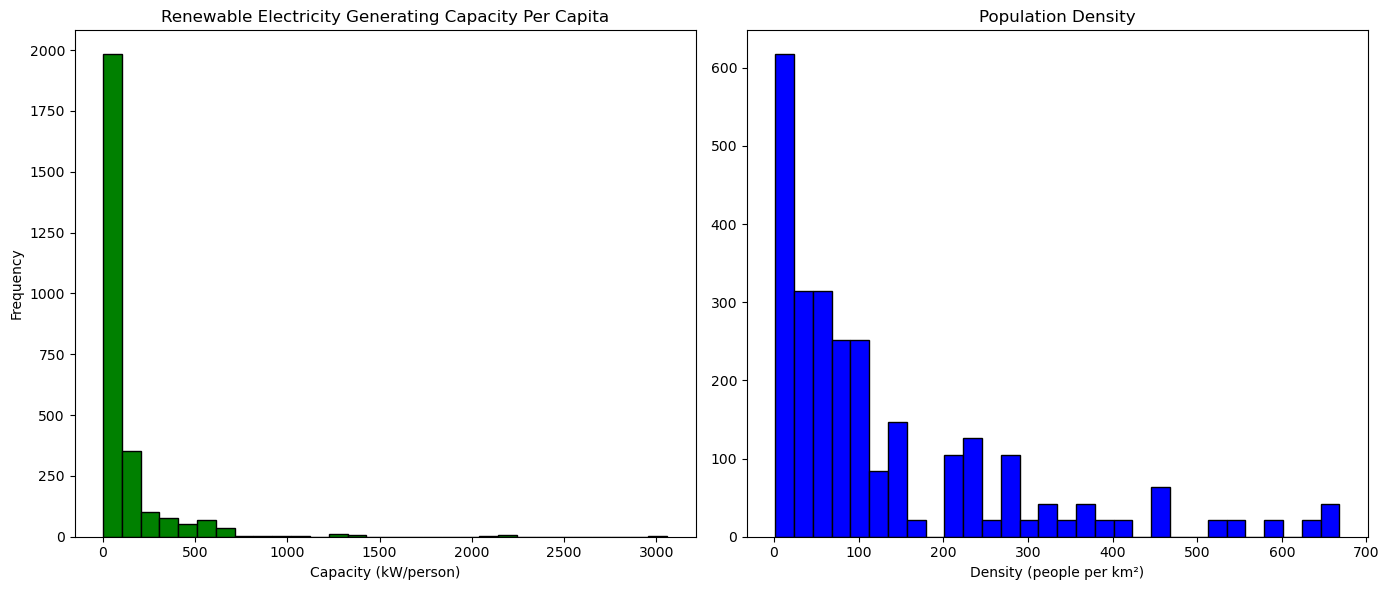

In [ ]:

global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')
global_df_clean = global_df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Density'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(global_df_clean['Renewable-electricity-generating-capacity-per-capita'], bins=30, color='green', edgecolor='black')
plt.title('Renewable Electricity Generating Capacity Per Capita')
plt.xlabel('Capacity (kW/person)')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(global_df_clean['Density'], bins=30, color='blue', edgecolor='black')
plt.title('Population Density')
plt.xlabel('Density (people per km²)')

plt.tight_layout()


plt.show()

In the first histogram (capacity per person), a high frequency of low values is observed, indicating that most of the data falls in the lower range of renewable energy generation capacity per person.

The second histogram (population density) shows a distribution where most values are also at the lower end of the range, indicating that most areas have relatively low population density.

There is no direct and strong correlation between population density and renewable energy generation capacity per person.

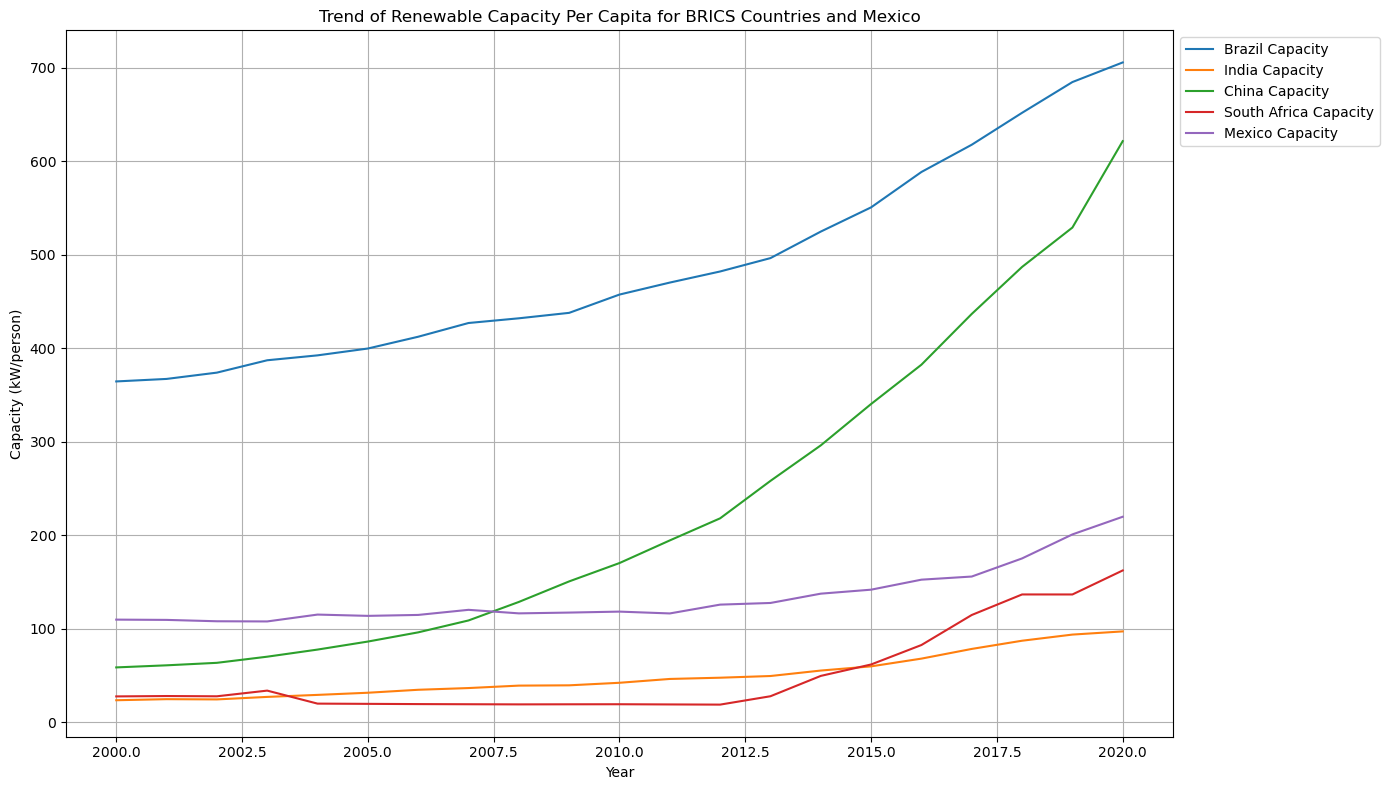

In [18]:
#Trend of Renewable capacity per capita for BRICS countries and Mexico
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']
brics_data = global_df[global_df['Entity'].isin(brics_countries)]

plt.figure(figsize=(14, 8))
for country in brics_countries:
    country_data = brics_data[brics_data['Entity'] == country]
    country_data_sorted = country_data.sort_values('Year')
    if not country_data_sorted.empty:
        plt.plot(country_data_sorted['Year'], country_data_sorted['Renewable-electricity-generating-capacity-per-capita'], label=f'{country} Capacity')

plt.title('Trend of Renewable Capacity Per Capita for BRICS Countries and Mexico')
plt.xlabel('Year')
plt.ylabel('Capacity (kW/person)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()


plt.show()


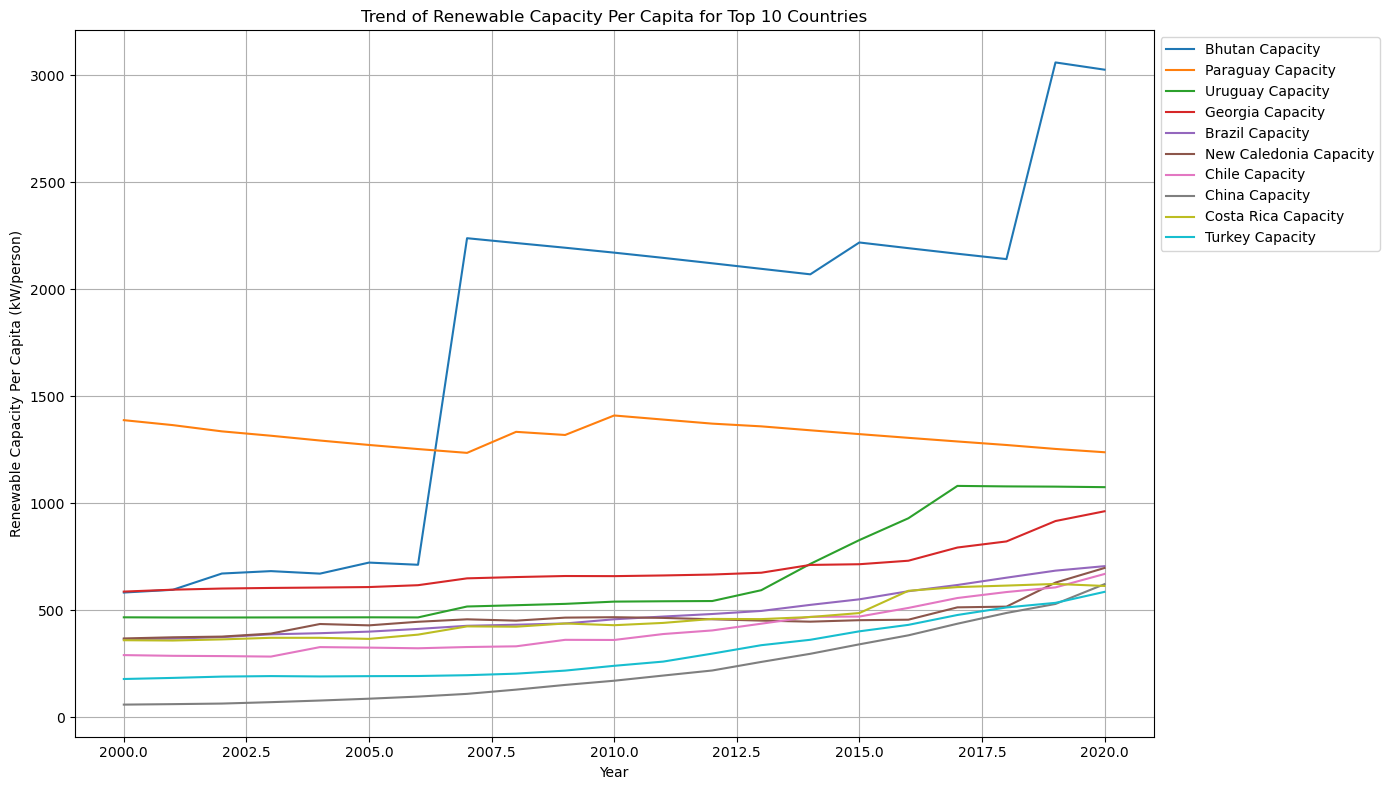

In [20]:
latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')
top10_countries = latest_data.nlargest(10, 'Renewable-electricity-generating-capacity-per-capita')['Entity'].tolist()
top10_data = global_df[global_df['Entity'].isin(top10_countries)]

plt.figure(figsize=(14, 8))

for country in top10_countries:
    country_data = top10_data[top10_data['Entity'] == country].sort_values('Year')
    
    if not country_data.empty:
        plt.plot(country_data['Year'], country_data['Renewable-electricity-generating-capacity-per-capita'], label=f'{country} Capacity')

plt.title('Trend of Renewable Capacity Per Capita for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Renewable Capacity Per Capita (kW/person)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()


The graph suggests a global trend towards investment in renewable energy, although the pace and scale of this investment varies significantly from country to country. These changes could be driven by political, economic, technological and environmental factors. For example, supportive government policies, technological advances that reduce the cost of renewable energy, and the need to reduce carbon emissions to combat climate change.

In [21]:
api_key="3bca82933cde424aab3d225b3be12558"

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/348217147.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/348217147.py:9: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/348217147.py:20: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_type.plot(ax=ax, label=energy_type.split(' (')[0],


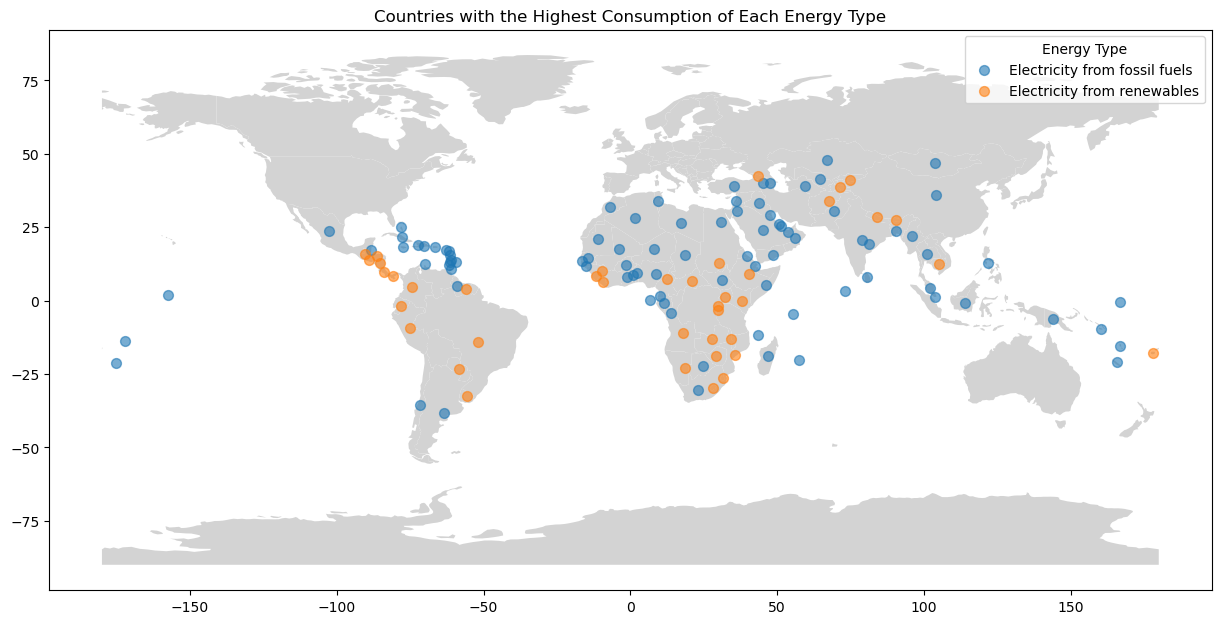

In [22]:
#Using addtional tools we identified the most used energy type consuption for each country
import geopandas as gpd
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')

energy_types = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']
latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)

gdf = gpd.GeoDataFrame(latest_data, geometry=gpd.points_from_xy(latest_data['Longitude'], latest_data['Latitude']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(ax=ax, color='lightgrey')

for energy_type in energy_types:
    gdf_type = gdf[gdf['Most consumed energy type'] == energy_type]

    gdf_type.plot(ax=ax, label=energy_type.split(' (')[0],
                  marker='o', markersize=50, alpha=0.6)

plt.title('Countries with the Highest Consumption of Each Energy Type')
ax.legend(title='Energy Type')
plt.show()

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/1957015108.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/1957015108.py:32: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_type.plot(


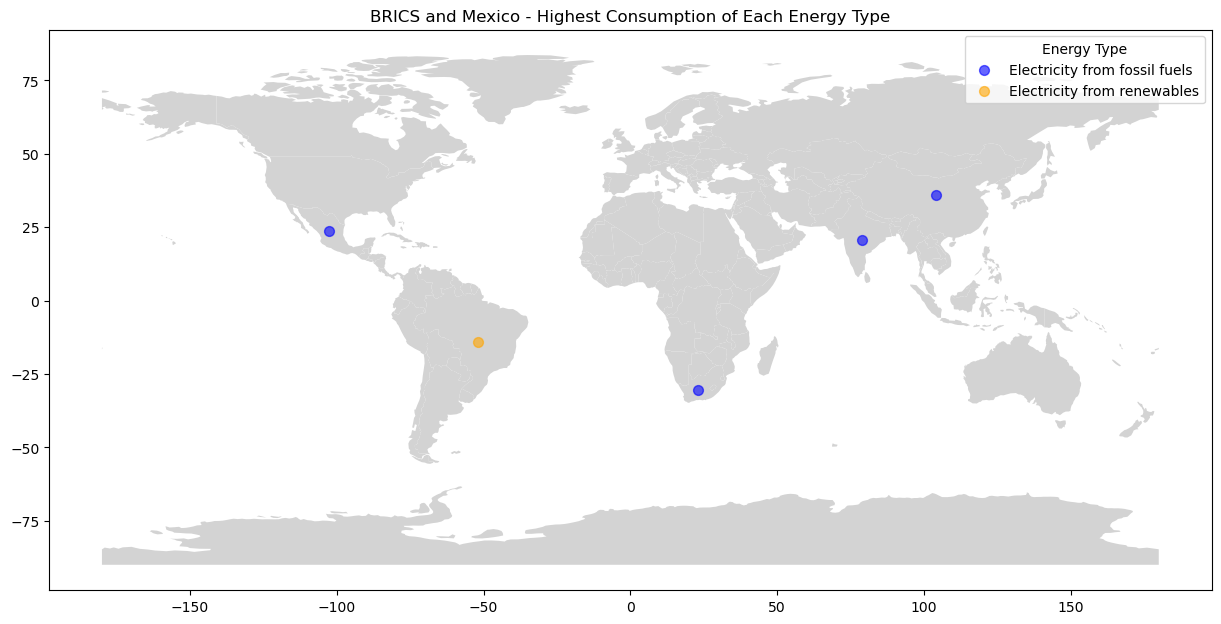

In [24]:
#We also made use of the same libraries for identifying specifically the BRICS countries and Mexico
import geopandas as gpd
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brics_and_mexico = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']

latest_data = global_df[global_df['Entity'].isin(brics_and_mexico)]
latest_data = latest_data.sort_values('Year').drop_duplicates('Entity', keep='last')

energy_types = [
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]

latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)
gdf = gpd.GeoDataFrame(latest_data, geometry=gpd.points_from_xy(latest_data['Longitude'], latest_data['Latitude']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(ax=ax, color='lightgrey')
color_map = {
    'Electricity from fossil fuels (TWh)': 'blue',
    'Electricity from nuclear (TWh)': 'green',
    'Electricity from renewables (TWh)': 'orange'
}

for energy_type in energy_types:
    gdf_type = gdf[gdf['Most consumed energy type'] == energy_type]

    gdf_type.plot(
        ax=ax,
        label=energy_type.split(' (')[0],
        marker='o',
        color=color_map[energy_type],
        markersize=50,
        alpha=0.6
    )

plt.title('BRICS and Mexico - Highest Consumption of Each Energy Type')
ax.legend(title='Energy Type')
plt.show()


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_1132/790943144.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


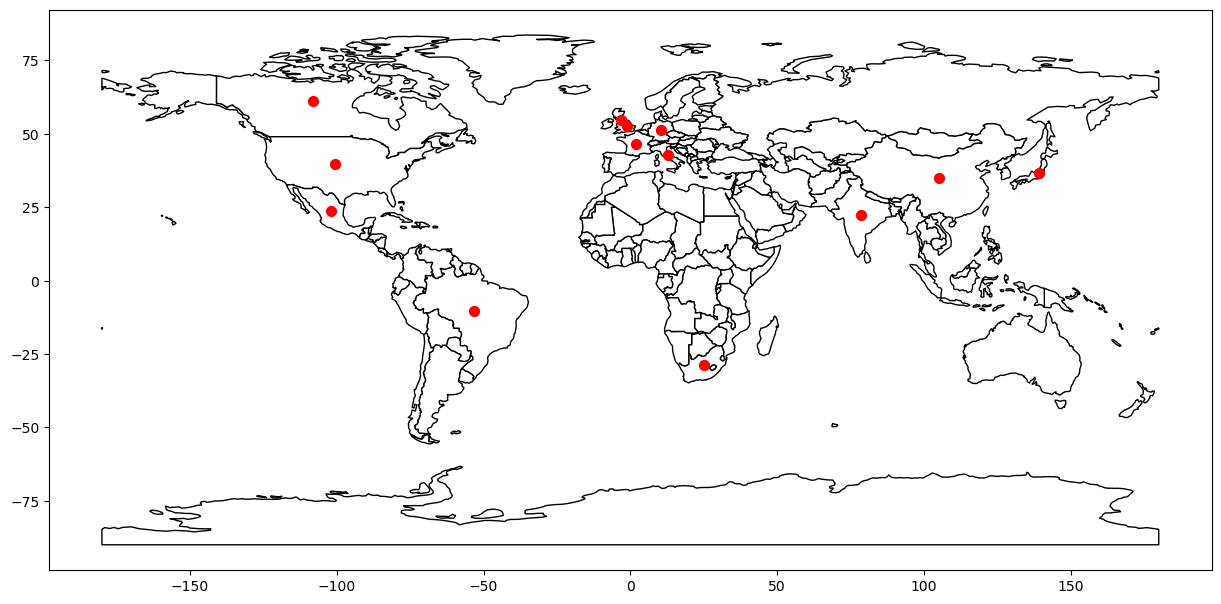

In [27]:
#Using the geo api we identified the countries that conforms BRICS, G7 and we also added Mexico
api_key = "3bca82933cde424aab3d225b3be12558"
countries = ["Mexico", "Germany", "Brazil", "China", "India", "South Africa", "Canada", "France","Italy","United Kingdom","England","Japan","United States"]

df_countries = pd.DataFrame(columns=['Country', 'Lat', 'Lon'])

for country in countries:
    params = {
        'text': country,
        'apiKey': api_key
    }
    response = requests.get("https://api.geoapify.com/v1/geocode/search", params=params)
    
    if response.status_code == 200:
        data = response.json()
        lat = data['features'][0]['geometry']['coordinates'][1]
        lon = data['features'][0]['geometry']['coordinates'][0]
        
        df_countries.loc[len(df_countries)] = {'Country': country, 'Lat': lat, 'Lon': lon}

gdf = gpd.GeoDataFrame(
    df_countries, geometry=gpd.points_from_xy(df_countries.Lon, df_countries.Lat))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=base, marker="o", color='red', markersize=50)

plt.show()